In [549]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy import NaN, nan, NAN

import seaborn as sns
import matplotlib.pyplot as plt

# plt 한글 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore')

In [550]:
df = DataFrame()

# csv파일 읽고 하나로 병합
for i in [2015,2016,2017,2018,2019]:
    for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    
        year = i
        month = j

        df2 = pd.read_excel('data/apt/{}{} 가양도시개발공사8단지(임대).xls'.format(year,month), header=2)

        df2['년'] = year
        df2['월'] = month

        df = pd.concat([df,df2], axis=0, ignore_index=True)
        
df

In [591]:
# 인덱스 리스트
index = df['분류 (클릭시 상세내역표시)']
index_list = list(index)
index_list

['공용관리비',
 '  일반관리비',
 '    인건비',
 '      급여',
 '      제수당',
 '      상여금',
 '      퇴직금',
 '      산재보험료',
 '      고용보험료',
 '      국민연금',
 '      건강보험료',
 '      식대 등 복리후생비',
 '    제사무비',
 '      일반사무용품비',
 '      도서인쇄비',
 '      여비교통비',
 '    제세공과금',
 '      공과금중 전기료',
 '      통신료',
 '      우편료',
 '      제세공과금 등',
 '    피복비',
 '    교육훈련비',
 '    차량유지비',
 '      연료비',
 '      수리비',
 '      보험료',
 '      기타차량유지비',
 '    그밖의부대비용',
 '      관리용품구입비',
 '      전문가자문비 등',
 '      잡비',
 '  청소비',
 '  경비비',
 '  소독비',
 '  승강기유지비',
 '  지능형홈네트워크설비유지비',
 '  수선유지비',
 '      수선비',
 '      시설유지비',
 '      안전점검비',
 '      재해예방비',
 '  위탁관리수수료',
 '개별사용료',
 '  난방비',
 '    난방 공용',
 '    난방 전용',
 '  급탕비',
 '    급탕 공용',
 '    급탕 전용',
 '  가스사용료',
 '    가스 공용',
 '    가스 전용',
 '  전기료',
 '    전기 공용',
 '    전기 전용',
 '  수도료',
 '    수도 공용',
 '    수도 전용',
 '  정화조오물수수료',
 '  생활폐기물수수료',
 '  입주자대표회의 운영비',
 '  건물보험료',
 '  선거관리위원회 운영비',
 '장기수선충당금 월부과액',
 '  월사용액',
 '  충당금잔액',
 '  적립요율(%)',
 '합계',
 '잡수입',
 '공용관리비',
 '  일반관리비

In [592]:
## 전용 관리비 항목 제거
index_list.remove('  난방비')
index_list.remove('  급탕비')
index_list.remove('  가스사용료')
index_list.remove('  전기료')
index_list.remove('  수도료')

index_list.remove('    난방 전용')
index_list.remove('    급탕 전용')
index_list.remove('    가스 전용')
index_list.remove('    전기 전용')
index_list.remove('    수도 전용')

## 전용 관리비 항목을 제거한 인덱스 추출 
index_row = list()

for i in index_list:
    index_row.append(df[df['분류 (클릭시 상세내역표시)']==i].index)
    
# 인덱스 순서 정렬
res = list()

for i in range(len(index_row)):
    res += list(index_row[i])

index_row = list(set(sorted(res)))

In [557]:
# 개별 관리비를 제거한 데이터프레임 생성
target_df = df.iloc[index_row,[18,19,0,1,2,3,4,5,6,7,8]]
target_df  # 65 * 9

# '분류 (클릭시 상세내역표시)' -> 분류
target_df.columns = ['년','월','분류', '우리단지총액', '우리단지단가', '유사단지군 평균', '관리비수준', '전년동월',
       '전년동월대비', '전월', '전월대비']

target_df

,년,월,분류,우리단지총액,우리단지단가,유사단지군 평균,관리비수준,전년동월,전년동월대비,전월,전월대비
0,2015,01,공용관리비,56133060,1233,1193.0,보통수준,1229,4▲,1159,74▲
1,2015,01,일반관리비,20075760,441,613.0,다소낮음,424,17▲,399,42▲
2,2015,01,인건비,18667600,410,582.0,다소낮음,401,9▲,378,32▲
3,2015,01,급여,10535010,231,NaN,-,233,2▼,217,14▲
4,2015,01,제수당,2660010,58,NaN,-,58,0,49,9▲
...,...,...,...,...,...,...,...,...,...,...,...
4195,2019,12,월사용액,0,0,NaN,-,0,0,0,0
4196,2019,12,충당금잔액,0,0,NaN,-,0,0,0,0
4197,2019,12,적립요율(%),0,0,NaN,-,0,0,0,0
4198,2019,12,합계,135856020,2985,NaN,-,2933,52▲,2539,446▲


In [594]:
# 우리단지총액의 합계가 0이 아닌 각 세부 관리비 항목을 개별 데이터프래임으로 생성

인건비list =  ['      급여','      제수당','      상여금','      퇴직금','      산재보험료','      고용보험료','      국민연금','      건강보험료','      식대 등 복리후생비']

인건비_row = list()

for i in 인건비list:
    인건비_row.append(target_df[target_df['분류']==i].index)
    
res = list()

for i in range(len(인건비_row)):
    res += list(인건비_row[i])

인건비_row = list(set(sorted(res)))
인건비_row


인건비df = target_df.iloc[인건비_row,]
인건비df = 인건비df.sort_values(['년','월'])
인건비df['분류'] = 인건비df['분류'].map(str.strip)
인건비df = 인건비df[인건비df['우리단지총액']!=0]

In [560]:
재사무비list = ['      일반사무용품비','      도서인쇄비','      여비교통비']

재사무비_row = list()

for i in 재사무비list:
    재사무비_row.append(target_df[target_df['분류']==i].index)
    
res = list()

for i in range(len(재사무비_row)):
    res += list(재사무비_row[i])

재사무비_row = list(set(sorted(res)))
재사무비_row


재사무비df = target_df.iloc[재사무비_row,]
재사무비df = 재사무비df.sort_values(['년','월'])
재사무비df['분류'] = 재사무비df['분류'].map(str.strip)
재사무비df = 재사무비df[재사무비df['우리단지총액']!=0]

In [561]:
제세공과금list = ['      공과금중 전기료', '      통신료','      우편료','      제세공과금 등']

제세공과금_row = list()

for i in 제세공과금list:
    제세공과금_row.append(target_df[target_df['분류']==i].index)
    
res = list()

for i in range(len(제세공과금_row)):
    res += list(제세공과금_row[i])

제세공과금_row = list(set(sorted(res)))
제세공과금_row


제세공과금df = target_df.iloc[제세공과금_row,]
제세공과금df = 제세공과금df.sort_values(['년','월'])
제세공과금df['분류'] = 제세공과금df['분류'].map(str.strip)
제세공과금df = 제세공과금df[제세공과금df['우리단지총액']!=0]

In [562]:
차량유지비list = ['      연료비','      수리비','      보험료','      기타차량유지비']

차량유지비_row = list()

for i in 차량유지비list:
    차량유지비_row.append(target_df[target_df['분류']==i].index)
    
res = list()

for i in range(len(차량유지비_row)):
    res += list(차량유지비_row[i])

차량유지비_row = list(set(sorted(res)))
차량유지비_row


차량유지비df = target_df.iloc[차량유지비_row,]
차량유지비df = 차량유지비df.sort_values(['년','월'])
차량유지비df['분류'] = 차량유지비df['분류'].map(str.strip)
차량유지비df = 차량유지비df[차량유지비df['우리단지총액']!=0]

In [563]:
그밖의부대비용list = ['      관리용품구입비','      전문가자문비 등','      잡비']

그밖의부대비용_row = list()

for i in 그밖의부대비용list:
    그밖의부대비용_row.append(target_df[target_df['분류']==i].index)
    
res = list()

for i in range(len(그밖의부대비용_row)):
    res += list(그밖의부대비용_row[i])

그밖의부대비용_row = list(set(sorted(res)))
그밖의부대비용_row


그밖의부대비용df = target_df.iloc[그밖의부대비용_row,]
그밖의부대비용df = 그밖의부대비용df.sort_values(['년','월'])
그밖의부대비용df['분류'] = 그밖의부대비용df['분류'].map(str.strip)
그밖의부대비용df = 그밖의부대비용df[그밖의부대비용df['우리단지총액']!=0]

In [564]:
# 항목과 년도 월을 입력하면 파이차트를 그려주는 함수

def piechart(index,y,m):
    df = globals()[index + 'df']
    year = y
    month = m

    view = df[(df['년']==year) & (df['월']==month)]

    plt.figure(figsize=(13,9))
    patches, texts, autotexts = plt.pie(view['우리단지총액'],
           labels=view['분류'],
           autopct='%1.1f%%',
            pctdistance=0.7
           )
    plt.title('{}년 {}월 {}'.format(y,m,index), fontsize = 30)
    ## label만 변경해주기 
    for t in texts:
        t.set_color("green")
        t.set_fontsize(15)
    ## pie 위의 텍스트를 다른 색으로 변경해주기 
    for t in autotexts:
        t.set_color("white")
        t.set_fontsize(15)

<Figure size 720x576 with 0 Axes>

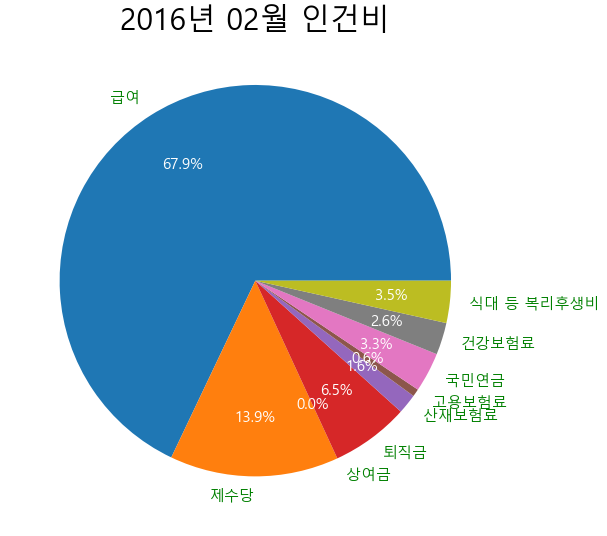

<Figure size 720x576 with 0 Axes>

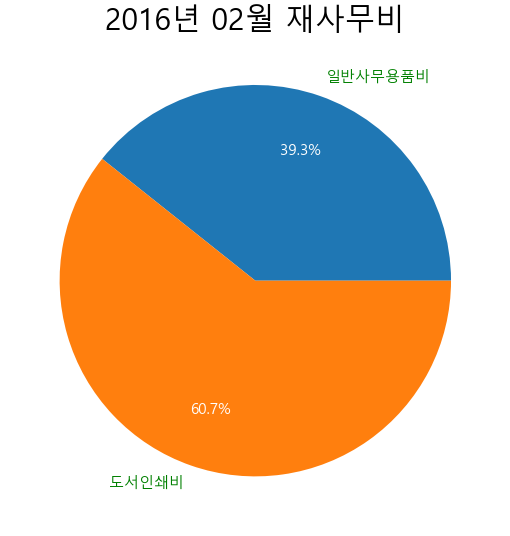

<Figure size 720x576 with 0 Axes>

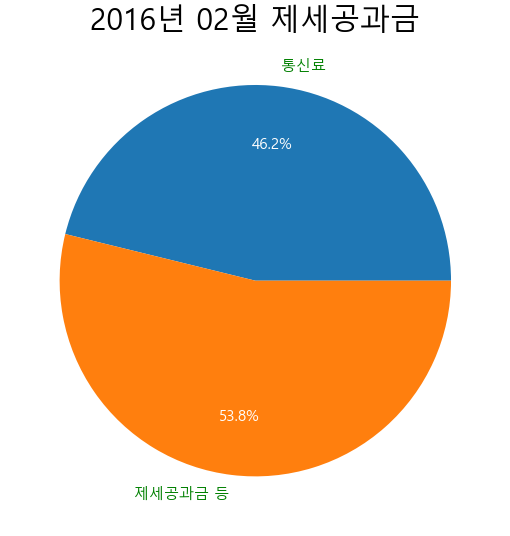

In [565]:
# '차량유지비','그밖의부대비용' 값이 없나가 모두 한 항목
title = ['인건비','재사무비','제세공과금']
year = 2016
month = '02'

for i in title:
    plt.figure(figsize=(10,8))
    piechart(i ,year, month)


In [566]:
target_df

,년,월,분류,우리단지총액,우리단지단가,유사단지군 평균,관리비수준,전년동월,전년동월대비,전월,전월대비
0,2015,01,공용관리비,56133060,1233,1193.0,보통수준,1229,4▲,1159,74▲
1,2015,01,일반관리비,20075760,441,613.0,다소낮음,424,17▲,399,42▲
2,2015,01,인건비,18667600,410,582.0,다소낮음,401,9▲,378,32▲
3,2015,01,급여,10535010,231,NaN,-,233,2▼,217,14▲
4,2015,01,제수당,2660010,58,NaN,-,58,0,49,9▲
...,...,...,...,...,...,...,...,...,...,...,...
4195,2019,12,월사용액,0,0,NaN,-,0,0,0,0
4196,2019,12,충당금잔액,0,0,NaN,-,0,0,0,0
4197,2019,12,적립요율(%),0,0,NaN,-,0,0,0,0
4198,2019,12,합계,135856020,2985,NaN,-,2933,52▲,2539,446▲


In [567]:
# 피벗테이블 생성

money_df = pd.pivot_table(target_df,
              index=['년','월'],
              columns=['분류'],
              values='우리단지총액',
              aggfunc='sum')

# 모든 값이 0인 항목 제거
zero_list = money_df.sum(axis=0) == 0
zero_list = money_df.columns[zero_list]
money_df.drop(zero_list,axis=1, inplace=True)

# 년, 월 열 추가
year = list()
month = list()

for i in range(money_df.shape[0]):
    year.append(money_df.index[i][0])
    month.append(money_df.index[i][1])
    
money_df['년'] = year
money_df['월'] = month

# 년 월 열을 맨 앞으로
money_df = money_df[['년','월','      건강보험료', '      고용보험료', '      국민연금', '      급여', '      도서인쇄비',
       '      산재보험료', '      상여금', '      수선비', '      식대 등 복리후생비',
      '      일반사무용품비', '      잡비', '      제세공과금 등', '      제수당', 
        '      통신료','      퇴직금', '    교육훈련비', '    그밖의부대비용', '    급탕 전용', 
       '    난방 공용', '    난방 전용', '    수도 공용', '    인건비', '    전기 공용', '    제사무비',
       '    제세공과금', '  경비비', '  급탕비', '  난방비', '  소독비', '  수도료', '  수선유지비',
       '  승강기유지비', '  일반관리비', '  전기료', '  청소비', '개별사용료', '공용관리비', '잡수입',
                     '합계']]

# 피벗테이블의 멀티인덱스를 단일인덱스로
index = list()
for i in range(len(money_df.index)):
    index.append(str(money_df.index[i][0]) + money_df.index[i][1])

money_df.index = index

# 열이름에서 공백 제거
money_df.columns = [line.strip() for line in list(money_df.columns)]

# 열 이름으로 정렬
money_df = money_df[sorted(money_df.columns)]

money_df = money_df[['년','월','개별사용료', '건강보험료', '경비비', '고용보험료', '공용관리비', 
                     '교육훈련비', '국민연금', '그밖의부대비용',
       '급여', '급탕 전용', '급탕비', '난방 공용', '난방 전용', '난방비', '도서인쇄비', '산재보험료',
       '상여금', '소독비', '수도 공용', '수도료', '수선비', '수선유지비', '승강기유지비', '식대 등 복리후생비',
       '인건비', '일반관리비', '일반사무용품비', '잡비', '잡수입', '전기 공용', '전기료', '제사무비',
       '제세공과금', '제세공과금 등', '제수당', '청소비', '통신료', '퇴직금', '합계']]

In [568]:
# 일반관리비 예측을 위한 데이터 프레임 생성
data = money_df[['일반관리비', '청소비', '경비비', '소독비','승강기유지비', '난방 공용', '수도 공용',
                 '전기 공용']]


In [569]:
일반관리비df = money_df.loc[:,['년', '월', '급여', '제수당', '상여금', '퇴직금', '산재보험료',
               '고용보험료', '국민연금', '건강보험료', '식대 등 복리후생비','일반사무용품비', 
                '도서인쇄비', '제세공과금 등','잡비']]
일반관리비df

,년,월,급여,제수당,상여금,퇴직금,산재보험료,고용보험료,국민연금,건강보험료,식대 등 복리후생비,일반사무용품비,도서인쇄비,제세공과금 등,잡비
201501,2015,01,10535010,2660010,1505010,1300000,253860,115360,631840,465600,1200910,190450,656000,246530,275000
201502,2015,02,10535000,2660000,1505000,1300000,264150,135480,631840,426560,1200900,376700,282000,89690,275000
201503,2015,03,10535000,2660000,1505000,1300000,228540,105070,631840,465600,1163330,422260,309000,114070,275000
201504,2015,04,10535000,2860000,1505000,1300000,250000,122470,631840,421480,1338330,203220,282000,104240,275000
201505,2015,05,10535010,2610020,1505000,1300000,455320,298580,631840,496080,1163340,170500,302000,91380,275000
201506,2015,06,10535000,2860000,1505000,1300000,255820,127530,634090,437590,700000,443450,332000,100370,275000
201507,2015,07,10535000,2890000,1505000,1300000,260780,120680,644620,473130,225000,498280,392000,116110,275000
201508,2015,08,10280290,2556580,1468620,1300000,260450,133800,644620,473130,1420760,374270,282000,94770,275000
201509,2015,09,13499710,1379970,0,1300000,260450,129990,659250,364980,1836880,214800,282000,159760,275000
201510,2015,10,13288760,1861240,0,1300000,642180,0,659250,473670,1634470,437150,282000,119940,275000


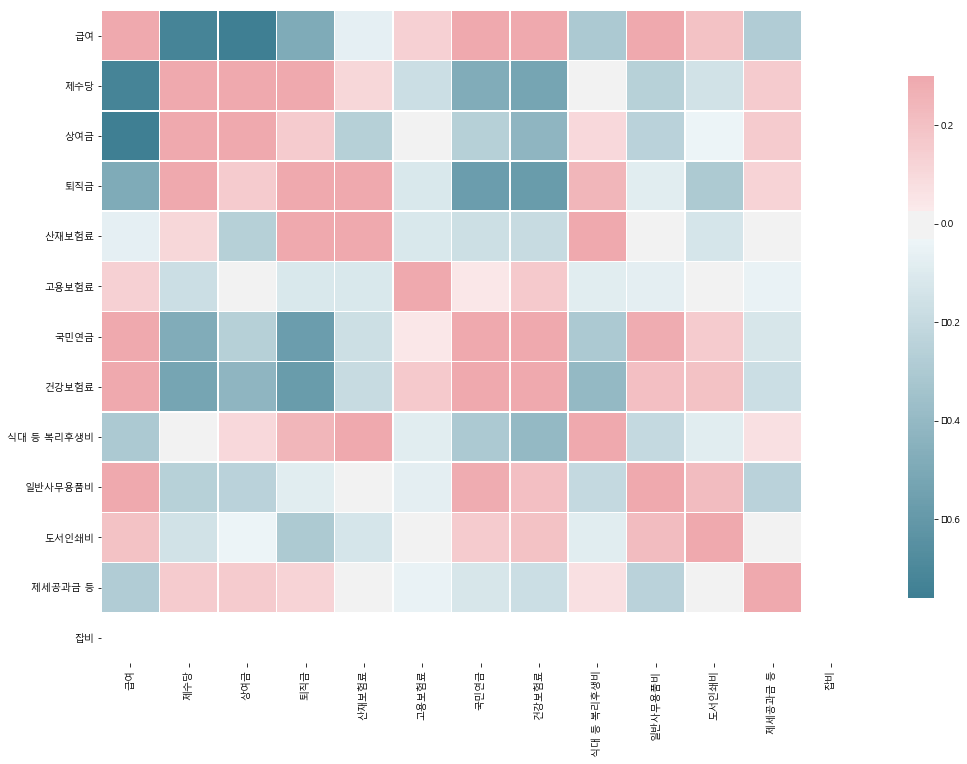

In [570]:
# 일반관리비 heatmap
plt.figure(figsize=(17,12))
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(일반관리비df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14]].corr(),
           cmap = cmap, linewidths=.5, center=0,vmax=.3, cbar_kws={'shrink':.80})       

In [571]:
# 가장 하위 항목의 컬럼들만 갖고있는 데이터프래임 생성
clean_df = money_df[['건강보험료', '경비비', '고용보험료', '교육훈련비', '국민연금', '그밖의부대비용', '급여', '급탕비',
       '난방 공용', '난방비', '도서인쇄비', '산재보험료', '상여금', '소독비', '수도 공용', '수도료',
       '수선비', '수선유지비', '승강기유지비', '식대 등 복리후생비', '인건비', '일반사무용품비', '잡비',
       '잡수입', '전기 공용', '전기료', '제사무비', '제세공과금', '제세공과금 등', '제수당', '청소비', '통신료',
       '퇴직금']]

# 상관계수 df
cor = clean_df.corr()

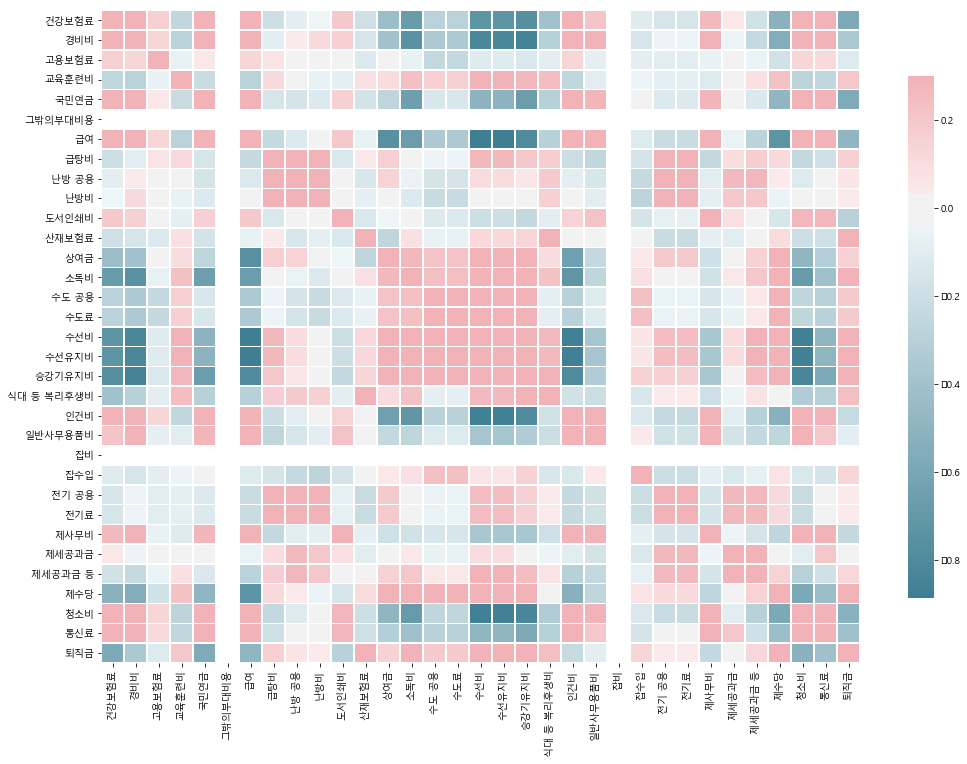

In [573]:
# 상관관계 히트맵

plt.figure(figsize=(17,12))
cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(cor,cmap = cmap, linewidths=.5, center=0,vmax=.3, cbar_kws={'shrink':.80})

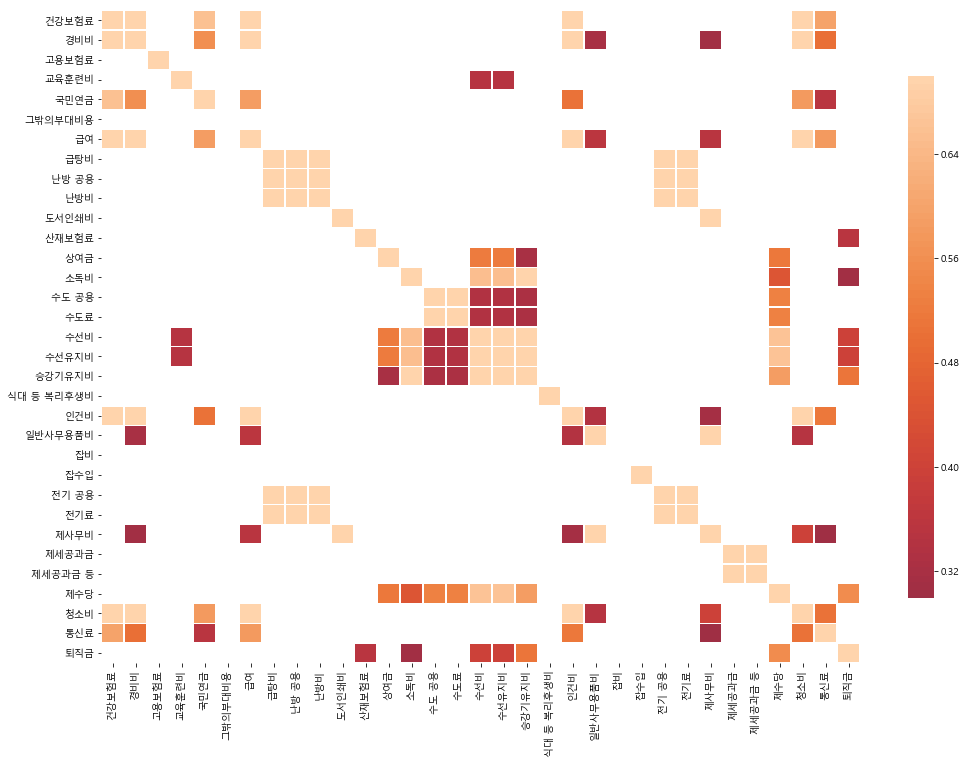

In [574]:
# 상관관계 0.3 이상만 => 상관관계가 높다
plt.figure(figsize=(17,12))
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cor[cor >=0.3], linewidths=.5, center=0, vmin=.3,vmax=.7, cbar_kws={'shrink':.80})

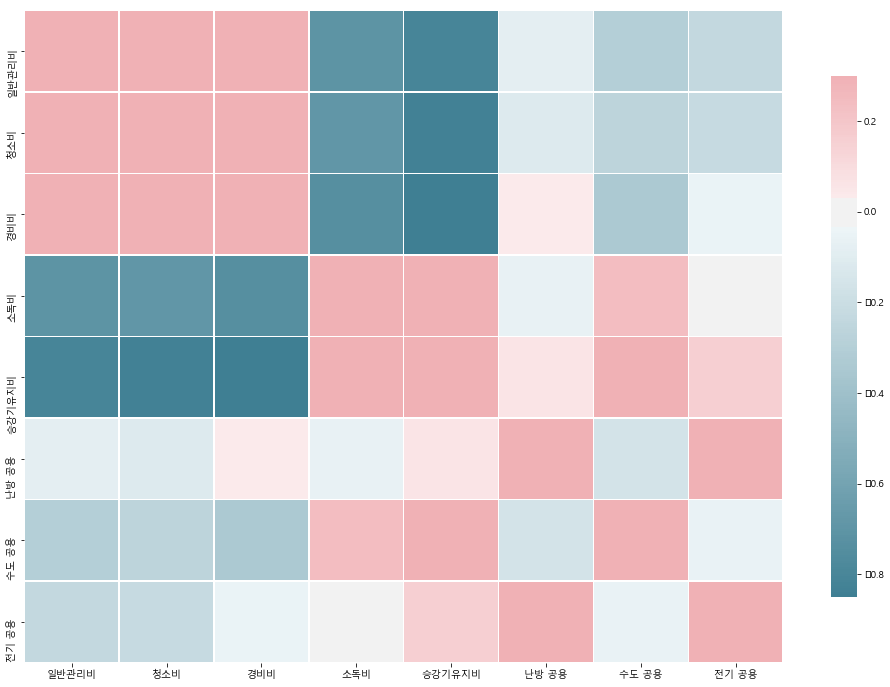

In [575]:
# 일반관리비에 영향을 주는 나머지 요소들과의 상관관계 분석
cor = data.corr()

# 상관관계 히트맵

plt.figure(figsize=(17,12))
cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(cor,cmap = cmap, linewidths=.5, center=0,vmax=.3, cbar_kws={'shrink':.80})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

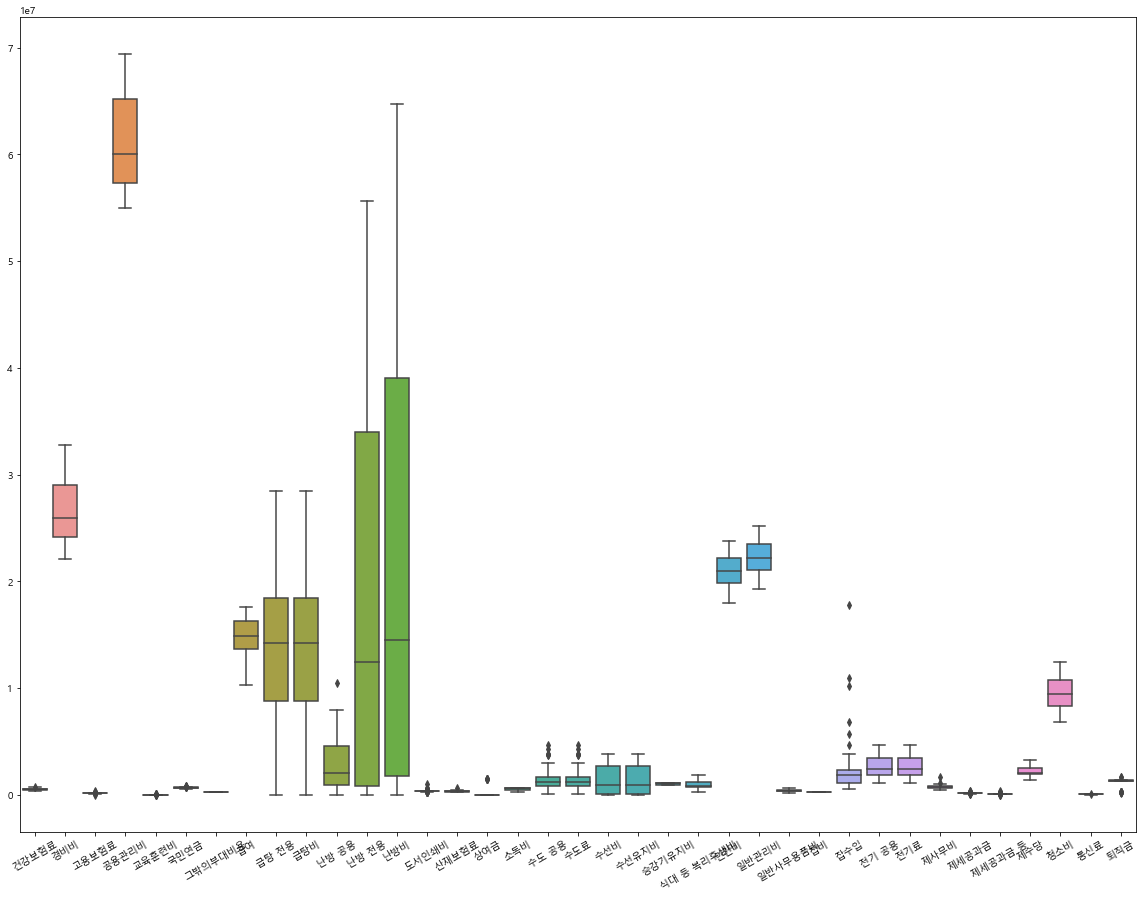

In [580]:
plt.figure(figsize=(20,15))
sns.boxplot(data=money_df.ix[:,3:40])
plt.xticks(rotation=30)

# 이상치 0 을 제외하면

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

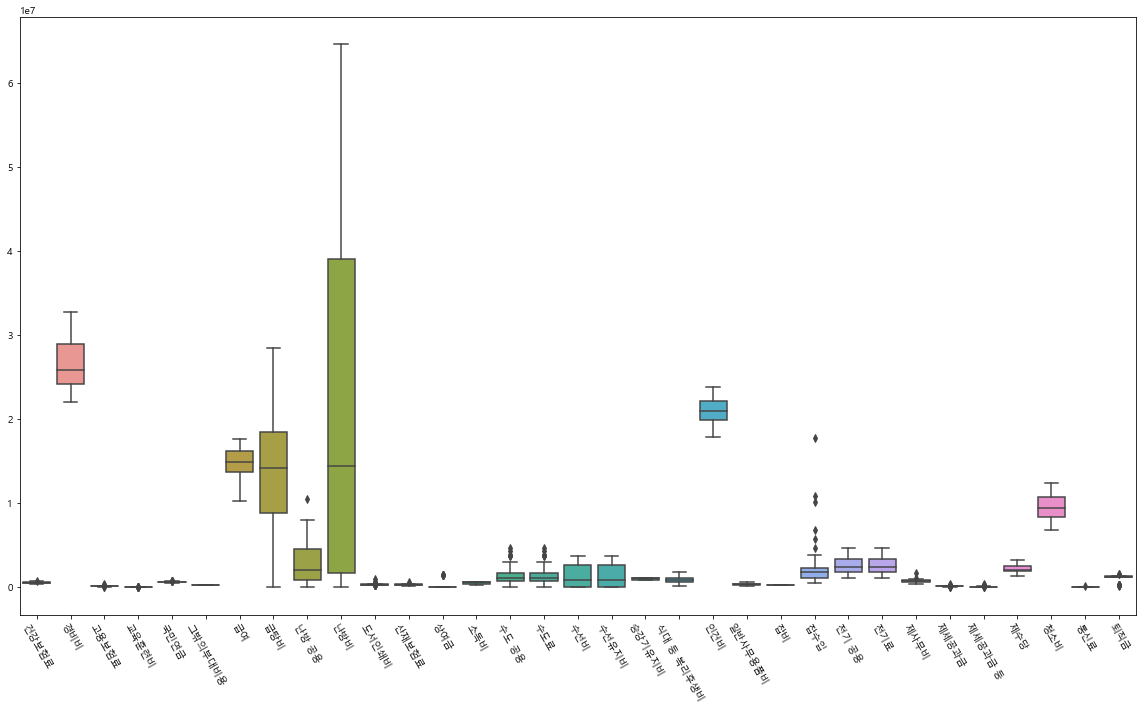

In [581]:
plt.figure(figsize=(20,11))
sns.boxplot(data=clean_df)
plt.xticks(rotation=-60)

# 이상치 0 을 제외하면

(array([0]), <a list of 1 Text xticklabel objects>)

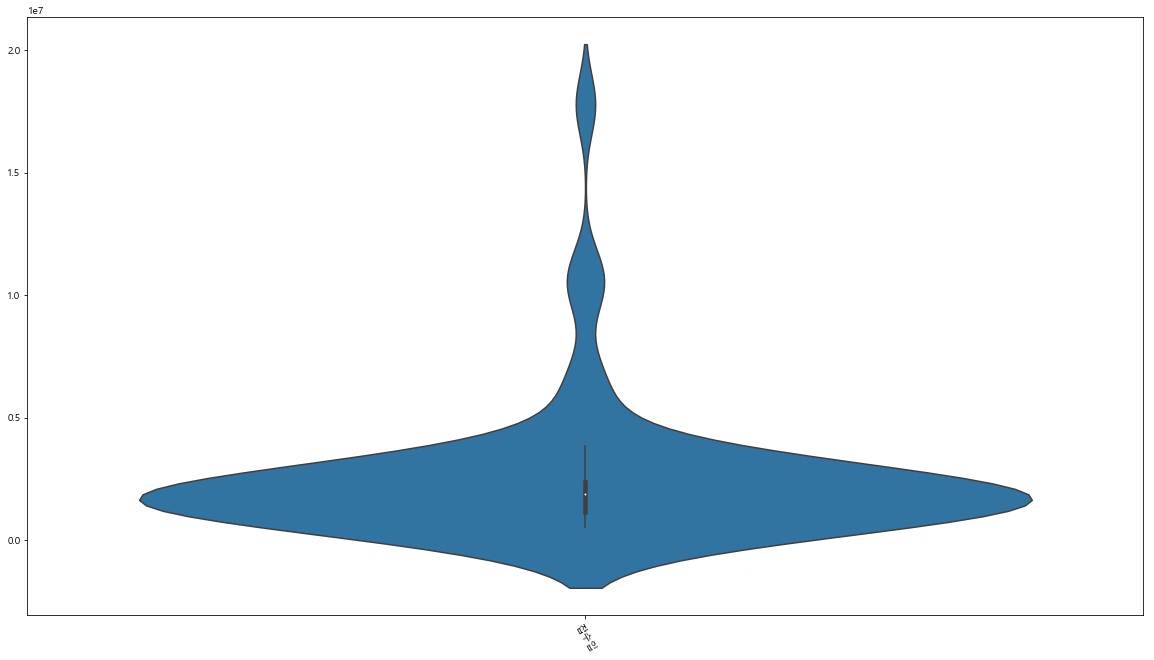

In [582]:
plt.figure(figsize=(20,11))
sns.violinplot(data=clean_df[['잡수입']])
plt.xticks(rotation=-60)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

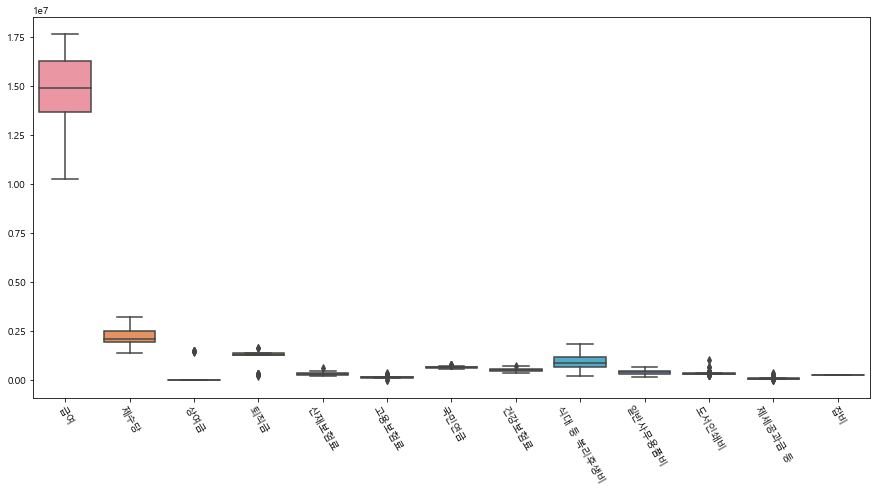

In [583]:
plt.figure(figsize=(15,7))
sns.boxplot(data=일반관리비df.ix[:,2:])
plt.xticks(rotation=-60)

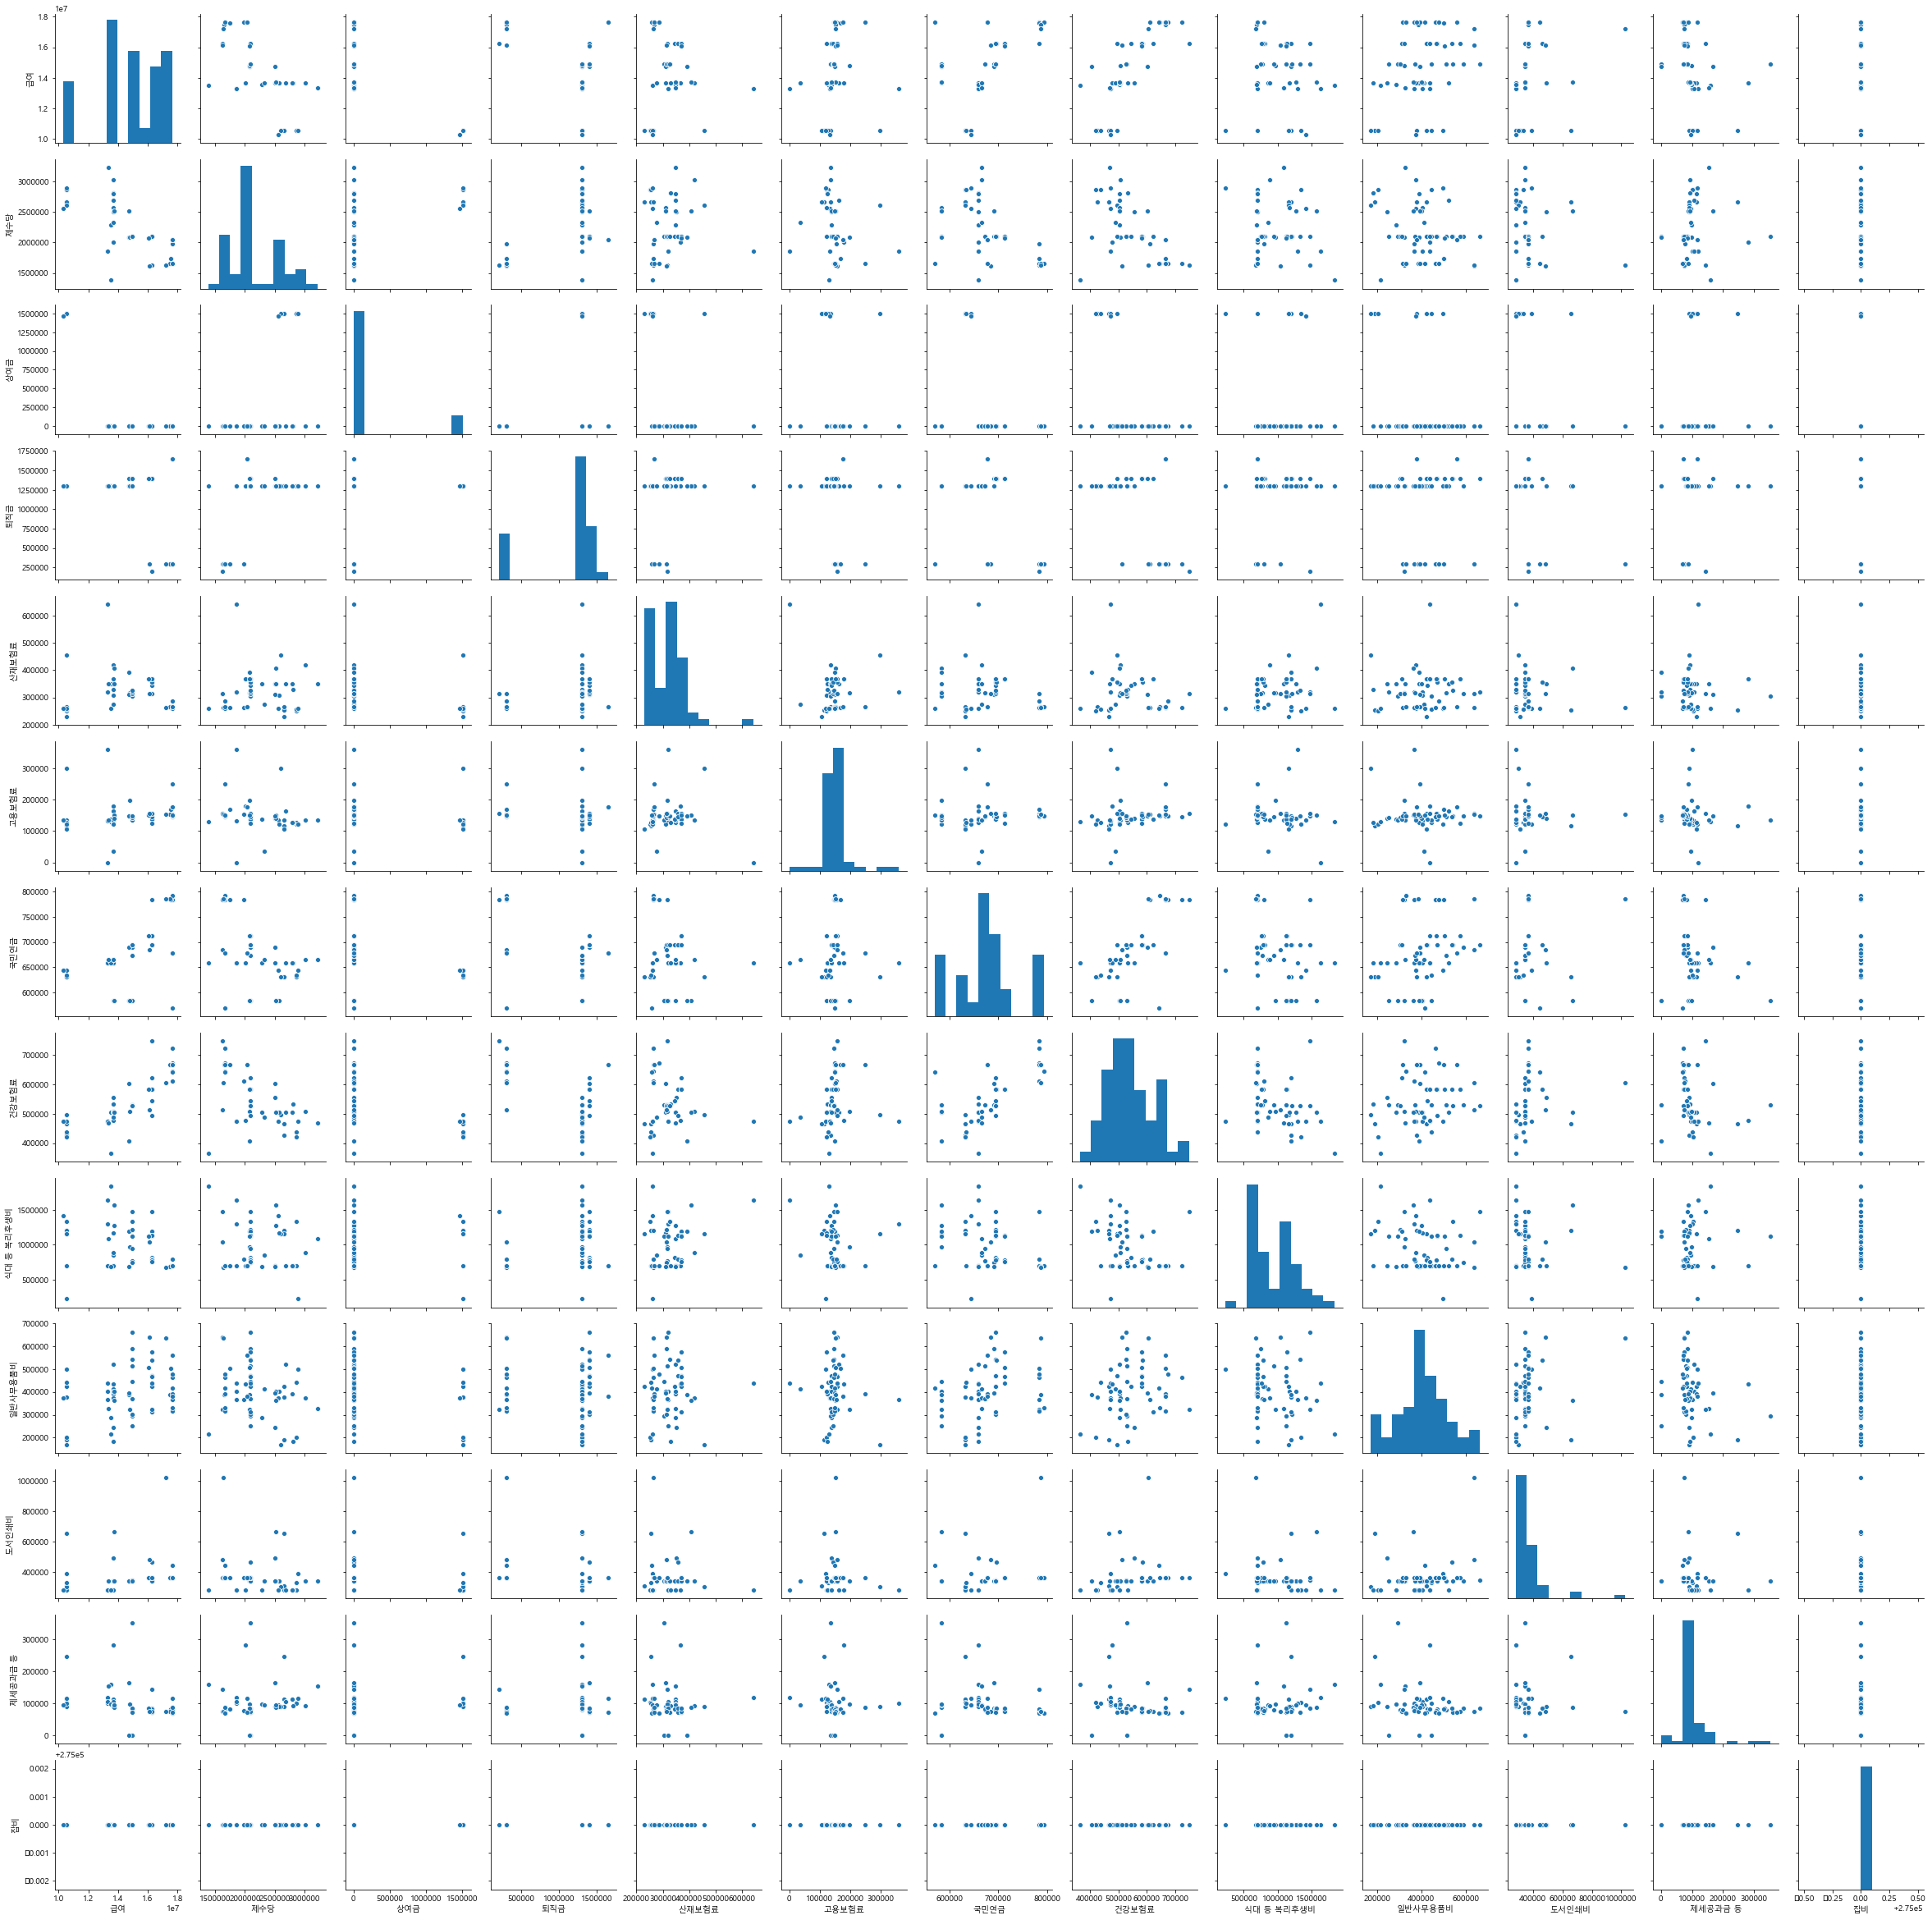

In [584]:
sns.pairplot(일반관리비df.ix[:,2:])

In [578]:
# 컬럼이름 사이의 공백 제거

col = list()
for i in data.columns:
    col.append(str.replace(i, ' ', ''))
data.columns = col

In [579]:
# OLS 회귀
# 일반관리비 산출 회귀모델 생성

import statsmodels.api as sm

reg = sm.OLS.from_formula('일반관리비~청소비+경비비+소독비+승강기유지비+난방공용+수도공용+전기공용', data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  일반관리비   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     39.85
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           1.02e-18
Time:                        15:22:19   Log-Likelihood:                -882.20
No. Observations:                  60   AIC:                             1780.
Df Residuals:                      52   BIC:                             1797.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.252e+07   3.66e+06      3.419      0.001    5.17e+06    1.99e+07
청소비            0.4494      0.115      3.903      0.000       0.218       0.681
경비비            0.2277      0.076      2.982      0.004       0.074       0.381
소독비           -1.6043      1.227     -1.307      0.197      -4.067       0.858
승강기유지비         1.0223      2.599      0.393      0.696      -4.193       6.237
난방공용           0.0834      0.064      1.313      0.195      -0.044       0.211
수도공용          -0.0400      0.089     -0.447      0.657      -0.220       0.140
전기공용          -0.3650      0.162     -2.253      0.029      -0.690      -0.040
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.128
Skew:                          -0.031   Prob(JB):                        0.569
Kurtosis:                       2.331   Cond. No.                     1.28e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [585]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# MinMax를 위한 객체 생성
scaler = MinMaxScaler()

In [586]:
## 랜덤포레스트 회귀
# 데이터셋 분할
x = data.drop(['일반관리비'],axis=1)
y = data['일반관리비']

# 정규화
x = scaler.fit_transform(x)

# 트레인,테스트셋 분할
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = 0.7, random_state=1004)

# 모델 생성
model = RandomForestRegressor()

# 모델 학습
model.fit(xtrain,ytrain)

# 모델 평가
print(model.score(xtrain, ytrain))
print(model.score(xtest, ytest))

0.9733872991551658
0.7530385514684915


In [587]:
## SVM 회귀 예측
# 모델 생성
model2 = SVC(C = 5,
    kernel = 'linear',
    gamma = 'auto_deprecated',
    random_state = 777)

# 모델 학습
model2.fit(xtrain, ytrain)

# 예측
ypred = model2.predict(xtest)

# 모델 평가
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypred)**0.5

svc_score = pd.DataFrame({'실제값':ytest, '예측값':ypred, '오차':(ypred-ytest)})
svc_score

,실제값,예측값,오차
201808,23600830,23613910,13080
201701,22305480,22712270,406790
201905,23468160,23257490,-210670
201806,23535080,23613910,78830
201811,22758080,23613910,855830
201707,21950970,22083570,132600
201507,19271350,19604880,333530
201901,23680490,23476390,-204100
201802,23840160,25191980,1351820
201704,21888390,21841160,-47230
